# Группа DE_622, Студент: Виталий Зайцев

# Домашнее задание по уроку 5  
1) Развернуть всю архитектуру у себя  
2) Написать ETL процесс для загрузки ВСЕХ таблиц из postgres-источника в postgres-приемник

---

# Выполнение домашнего задания

# 0. Подготовительная часть

## Подготовка докер образов  
docker ps

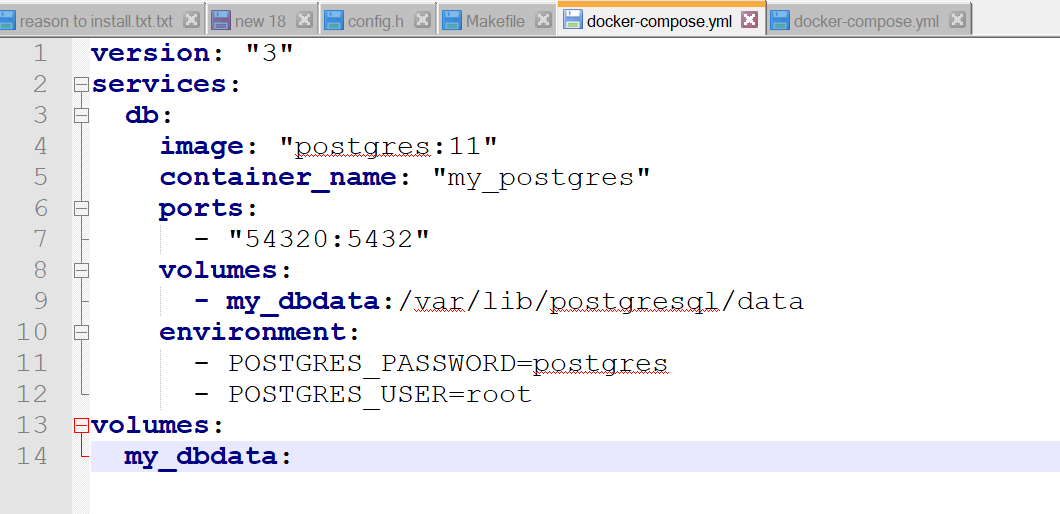

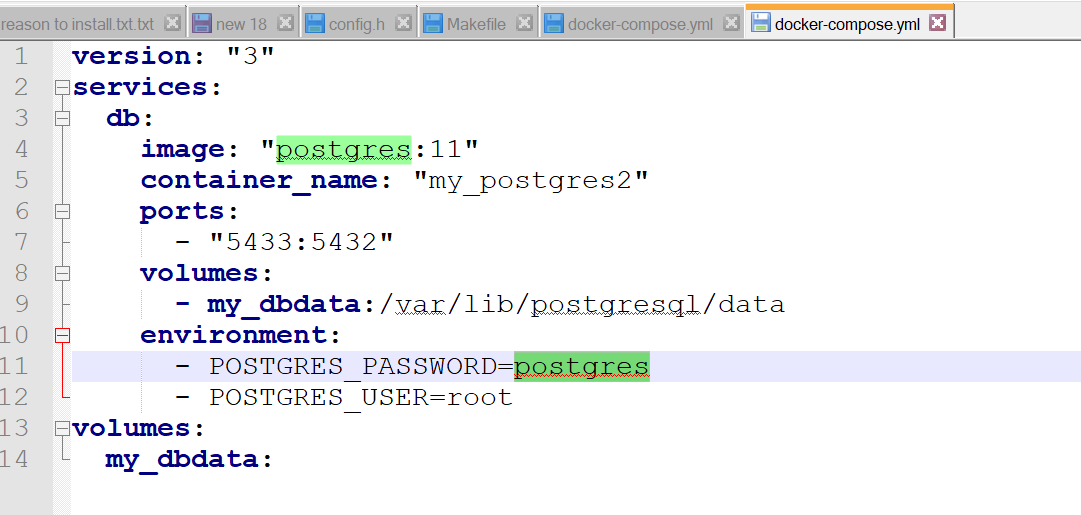

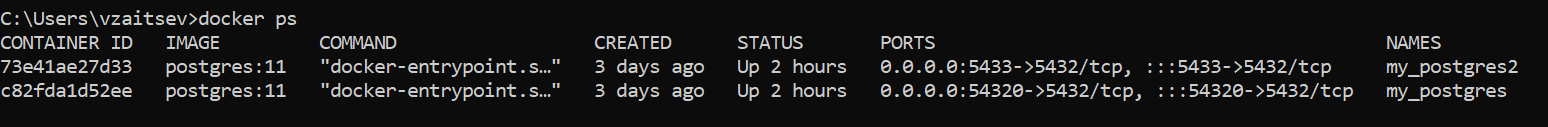

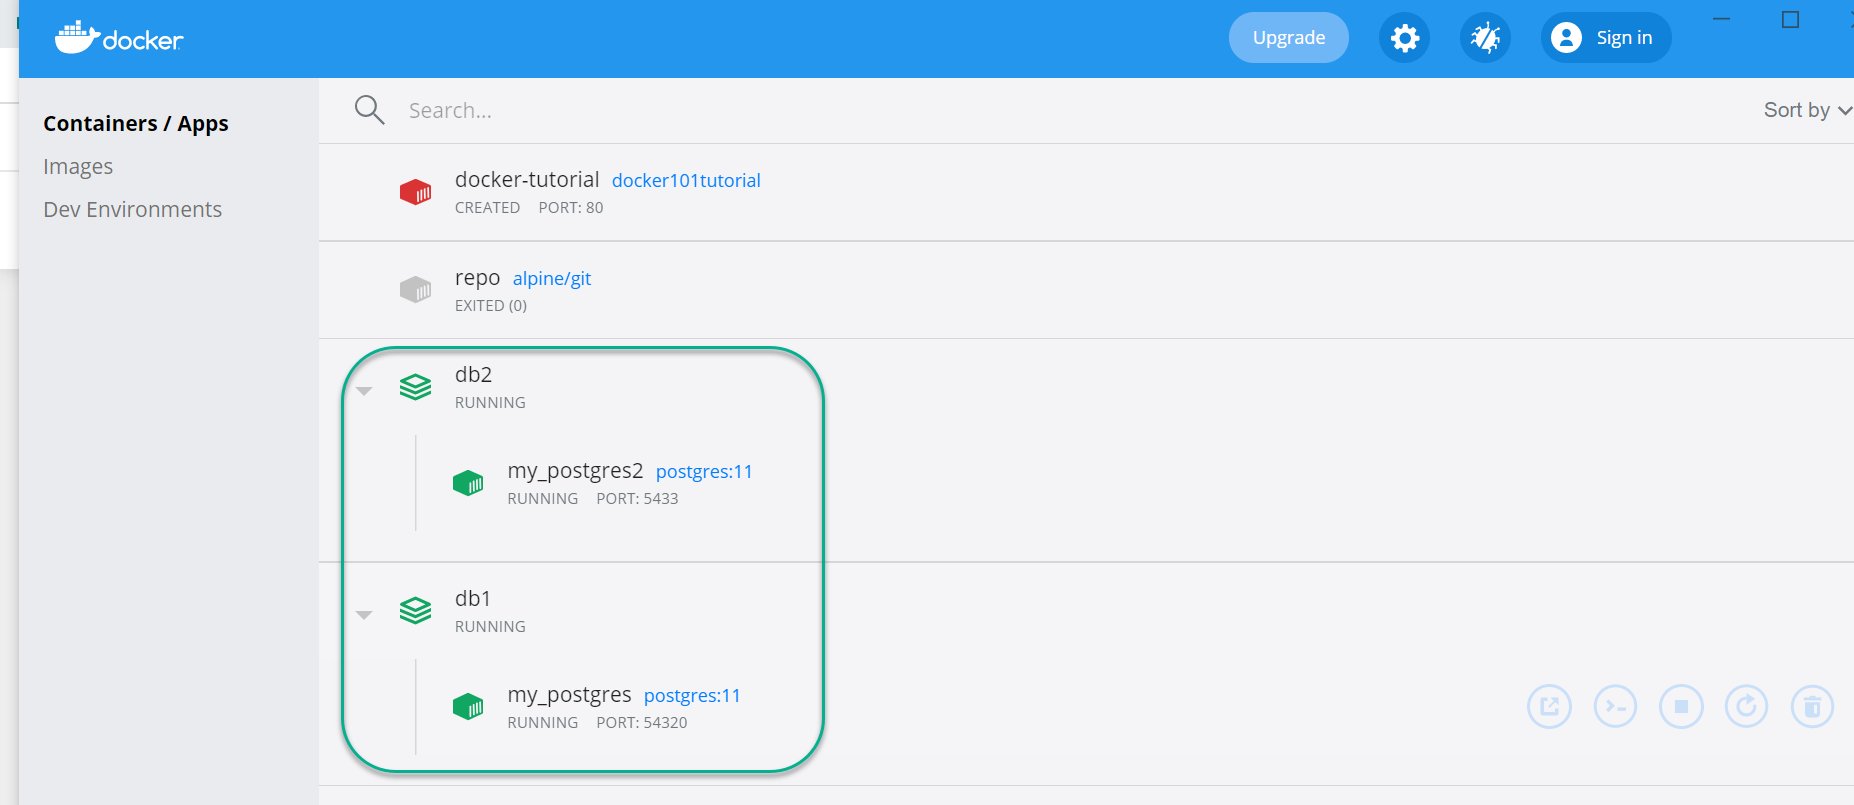

## Создание баз для работы   
docker exec -it my_postgres psql -U root -c "create database my_database"  
Done  
docker exec -it my_postgres2 psql -U root -c "create database my_database2"  
Done

# Установка необходимых python пакетов  
psycopg2

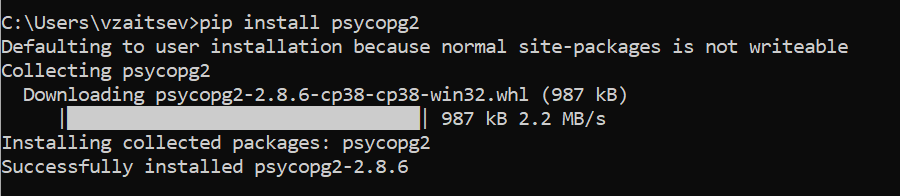

## Проверка соединений к созданным базам  
### 'my_database' (port 54320)

In [6]:
import psycopg2

# Параметры соединения
conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
# dbname='tpch'
# conn_string= "host='localhost' port=54320 dbname='tpch' user='root' password='postgres'" 


# Создаем соединение (оно поддерживает контекстный менеджер, рекомендую пользоваться им)
# Создаем курсор - это специальный объект который делает запросы и получает их результаты
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    #query = 'select * from customer limit 1' # запрос к БД
    query = 'SELECT datname FROM pg_database;' # запрос к БД
    cursor.execute(query) # выполнение запроса
    result = cursor.fetchone() # получение результата
    print(result)

('postgres',)


### 'my_database2' (port 5433)

In [5]:
import psycopg2

# Параметры соединения
conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 

# Создаем соединение (оно поддерживает контекстный менеджер, рекомендую пользоваться им)
# Создаем курсор - это специальный объект который делает запросы и получает их результаты
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    #query = 'select * from customer limit 1' # запрос к БД
    query = 'SELECT datname FROM pg_database;' # запрос к БД
    cursor.execute(query) # выполнение запроса
    result = cursor.fetchone() # получение результата
    print(result)

('postgres',)


## Создание таблиц  
cd C:\Users\vzaitsev\!Git-REPO\tpch-kit\dbgen\  

docker cp ./dss.ddl my_postgres:/  

docker cp ./dss.ddl my_postgres2:/  

docker exec -it my_postgres psql my_database -f dss.ddl  

docker exec -it my_postgres2 psql my_database -f dss.ddl  

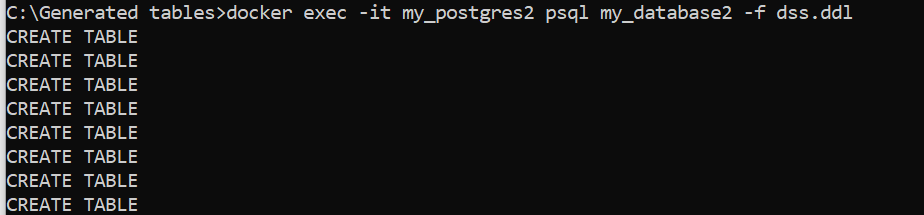

## Синтез данных  
Неуспешно, проблема при компиляции makefile под Win10.  
Данные таблиц получены у предподавателя

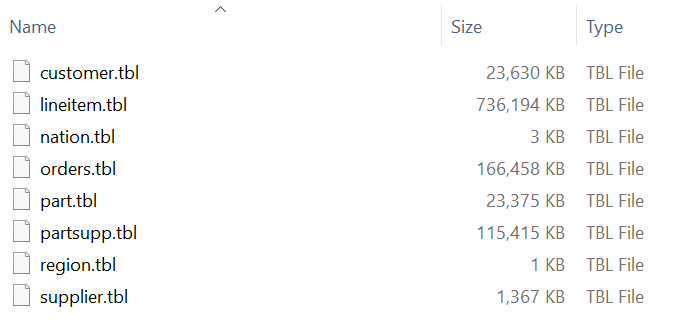

## my_database
### Копирование данных в контейнер

cd C:\Generated tables  
docker cp ./customer.tbl my_postgres:/  
docker cp ./lineitem.tbl my_postgres:/  
docker cp ./nation.tbl my_postgres:/  
docker cp ./orders.tbl my_postgres:/  
docker cp ./part.tbl my_postgres:/  
docker cp ./partsupp.tbl my_postgres:/  
docker cp ./region.tbl my_postgres:/  
docker cp ./supplier.tbl my_postgres:/  

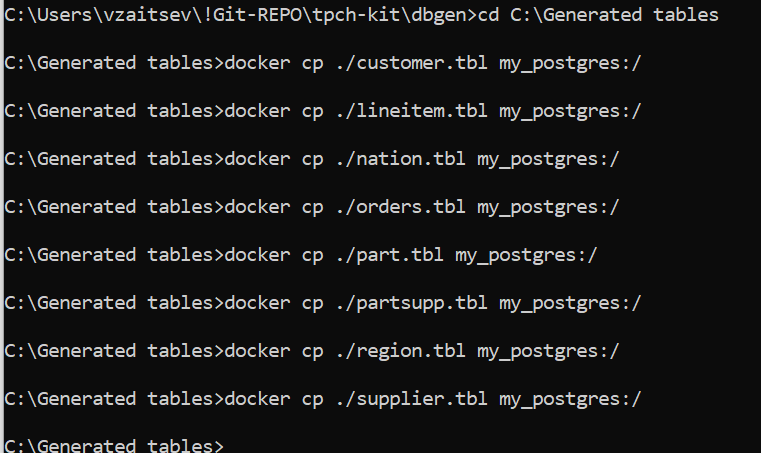

### Загрузка данных в базу  
docker exec -it my_postgres psql my_database -c "\copy customer FROM '/customer.tbl' CSV DELIMITER '|'"  
docker exec -it my_postgres psql my_database -c "\copy lineitem FROM '/lineitem.tbl' CSV DELIMITER '|'"  
docker exec -it my_postgres psql my_database -c "\copy nation FROM '/nation.tbl' CSV DELIMITER '|'"  
docker exec -it my_postgres psql my_database -c "\copy orders FROM '/orders.tbl' CSV DELIMITER '|'"  
docker exec -it my_postgres psql my_database -c "\copy part FROM '/part.tbl' CSV DELIMITER '|'"  
docker exec -it my_postgres psql my_database -c "\copy partsupp FROM '/partsupp.tbl' CSV DELIMITER '|'"  
docker exec -it my_postgres psql my_database -c "\copy region FROM '/region.tbl' CSV DELIMITER '|'"  
docker exec -it my_postgres psql my_database -c "\copy supplier FROM '/supplier.tbl' CSV DELIMITER '|'"  

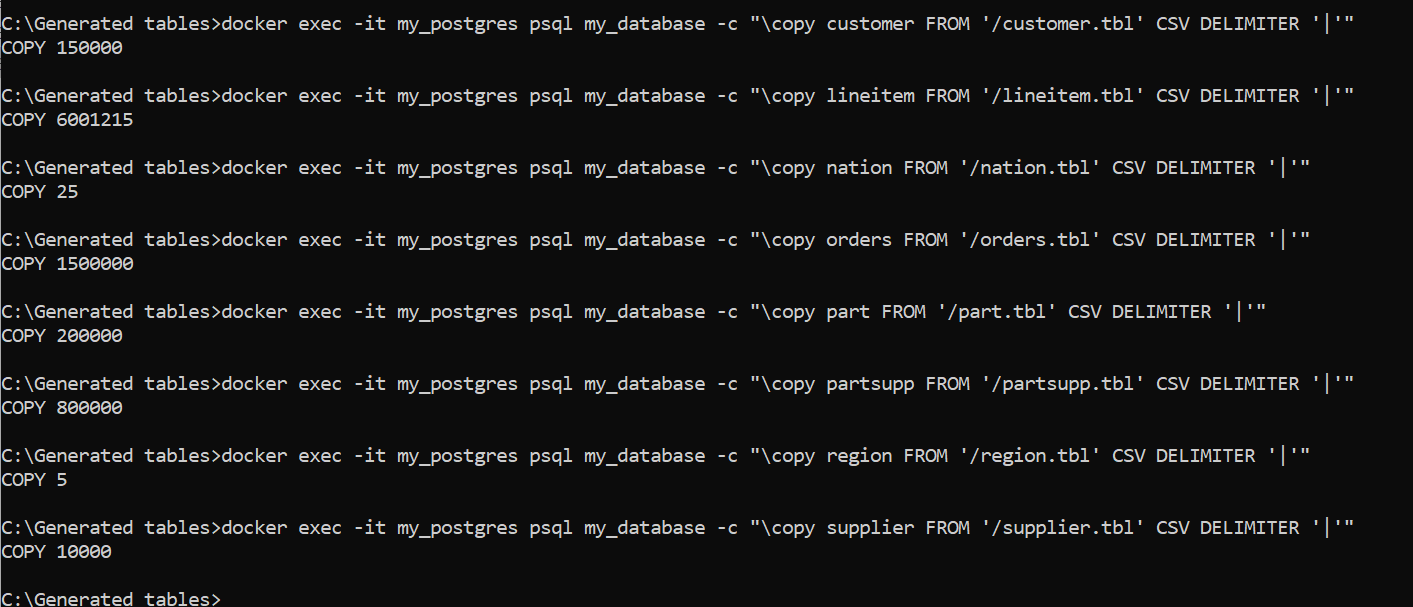

## Проверка наличия данных (my_database, customer)

In [21]:
import psycopg2

# Параметры соединения
conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
# dbname='tpch'
# conn_string= "host='localhost' port=54320 dbname='tpch' user='root' password='postgres'" 


# Создаем соединение (оно поддерживает контекстный менеджер, рекомендую пользоваться им)
# Создаем курсор - это специальный объект который делает запросы и получает их результаты
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    query = 'select * from customer limit 2' # запрос к БД
    cursor.execute(query) # выполнение запроса
    result = cursor.fetchall() # получение результата
    print(result)

[(1, 'Customer#000000001', 'IVhzIApeRb ot,c,E', 15, '25-989-741-2988', Decimal('711.56'), 'BUILDING  ', 'to the even, regular platelets. regular, ironic epitaphs nag e'), (2, 'Customer#000000002', 'XSTf4,NCwDVaWNe6tEgvwfmRchLXak', 13, '23-768-687-3665', Decimal('121.65'), 'AUTOMOBILE', 'l accounts. blithely ironic theodolites integrate boldly: caref')]


---

# 1. ETL процедура для таблицы customer

Для каждой таблицы:
* дамп в файл из исхоной таблицы
* проверка выгруженого дампа в pandas
* загрузка из дампа в целевую таблицу
* select count(*) по целевой таблице

Перечень таблиц:
1. customer
2. lineitem
3. nation
4. orders
5. part
6. partsupp
7. region
8. supplier

In [30]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY customer TO STDOUT WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_customer.csv", 'w') as f:
        cursor.copy_expert(q, f)

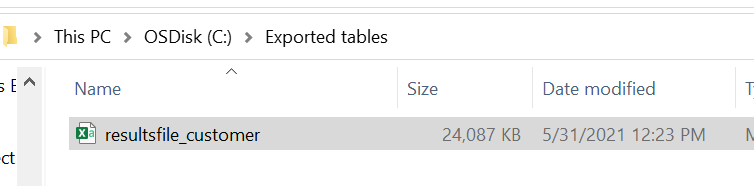

In [31]:
import pandas as pd

pd.read_csv("C:\\Exported tables\\resultsfile_customer.csv")

,c_custkey,c_name,c_address,c_nationkey,c_phone,c_acctbal,c_mktsegment,c_comment
0,1,Customer#000000001,"IVhzIApeRb ot,c,E",15,25-989-741-2988,711.56,BUILDING,"to the even, regular platelets. regular, ironi..."
1,2,Customer#000000002,"XSTf4,NCwDVaWNe6tEgvwfmRchLXak",13,23-768-687-3665,121.65,AUTOMOBILE,l accounts. blithely ironic theodolites integr...
2,3,Customer#000000003,MG9kdTD2WBHm,1,11-719-748-3364,7498.12,AUTOMOBILE,"deposits eat slyly ironic, even instructions...."
3,4,Customer#000000004,XxVSJsLAGtn,4,14-128-190-5944,2866.83,MACHINERY,"requests. final, regular ideas sleep final accou"
4,5,Customer#000000005,KvpyuHCplrB84WgAiGV6sYpZq7Tj,3,13-750-942-6364,794.47,HOUSEHOLD,n accounts will have to unwind. foxes cajole a...
...,...,...,...,...,...,...,...,...
149995,149996,Customer#000149996,syg3m0h2HMEUY6zJ2GEVMKkBl,10,20-149-234-3062,8524.71,AUTOMOBILE,maintain fluffily fluffily bold theodolites! ...
149996,149997,Customer#000149997,ufK xSg6NRC8QaunPB7J,21,31-694-123-5061,8936.21,MACHINERY,xes haggle carefully slow platelets. slyly reg...
149997,149998,Customer#000149998,"NaDi,1fCNPDTntnVUjGyUJ8TrlIeYNK7v",2,12-860-414-6024,5952.41,BUILDING,"ideas cajole slyly around the even, pending f..."
149998,149999,Customer#000149999,nBpZoYhCPFKZqSunxdeHtRN08x3RE8hqh,1,11-401-828-7411,6104.03,AUTOMOBILE,s haggle about the final foxes. carefully spec...


In [36]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY customer from STDIN WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_customer.csv", 'r') as f:
        cursor.copy_expert(q, f)

In [38]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from customer')
    print(cursor.fetchall())

[(150000,)]


__Вывод:__ Количество экспортированных записей в дампе (150 000) равно количеству записей в целевой таблице (150 000). Успех.

---

# 2. ETL процедура для таблицы lineitem

In [ ]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY lineitem TO STDOUT WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_lineitem.csv", 'w') as f:
        cursor.copy_expert(q, f)

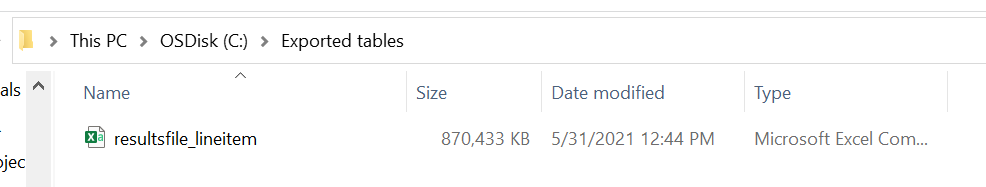

__Внимание__ Таблица содержит около 870 тыс записей, этот код "подвисает", НЕ смог дождаться завершения
import pandas as pd
pd.read_csv("C:\\Exported tables\\resultsfile_lineitem.csv")

Взамен просто подсчитал количество строк в файле (предполагая, что каждая строка = отдельная запись)

In [36]:
lines = 0
with open("C:\\Exported tables\\resultsfile_lineitem.csv") as f:
    for line in f:
        lines = lines + 1
print(lines)

6001216


In [3]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY lineitem from STDIN WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_lineitem.csv", 'r') as f:
        cursor.copy_expert(q, f)

In [37]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from lineitem')
    print(cursor.fetchall())

[(6001215,)]


__Вывод:__ Количество экспортированных записей в дампе lineitem 6 001 216 (помним, что одна строка - это заголовки столбцов), итого 6 001 215 записей равно равно количеству записей в целевой таблице 6 001 215. Успех.

---

# 3. ETL процедура для таблицы nation

In [4]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY nation TO STDOUT WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_nation.csv", 'w') as f:
        cursor.copy_expert(q, f)

In [5]:
import pandas as pd
pd.read_csv("C:\\Exported tables\\resultsfile_nation.csv")

,n_nationkey,n_name,n_regionkey,n_comment
0,0,ALGERIA,0,haggle. carefully final deposits detect slyly...
1,1,ARGENTINA,1,al foxes promise slyly according to the regula...
2,2,BRAZIL,1,y alongside of the pending deposits. carefully...
3,3,CANADA,1,"eas hang ironic, silent packages. slyly regula..."
4,4,EGYPT,4,y above the carefully unusual theodolites. fin...
5,5,ETHIOPIA,0,ven packages wake quickly. regu
6,6,FRANCE,3,"refully final requests. regular, ironi"
7,7,GERMANY,3,"l platelets. regular accounts x-ray: unusual, ..."
8,8,INDIA,2,ss excuses cajole slyly across the packages. d...
9,9,INDONESIA,2,slyly express asymptotes. regular deposits ha...


In [6]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY nation from STDIN WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_nation.csv", 'r') as f:
        cursor.copy_expert(q, f)

In [7]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from nation')
    print(cursor.fetchall())

[(25,)]


Вывод: Количество экспортированных записей в дампе nation (0..24=25) равно количеству записей в целевой таблице (25). Успех.

---

# 4. ETL процедура для таблицы orders

In [8]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY orders TO STDOUT WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_orders.csv", 'w') as f:
        cursor.copy_expert(q, f)

In [9]:
import pandas as pd
pd.read_csv("C:\\Exported tables\\resultsfile_orders.csv")

,o_orderkey,o_custkey,o_orderstatus,o_totalprice,o_orderdate,o_orderpriority,o_clerk,o_shippriority,o_comment
0,1,36901,O,173665.47,1996-01-02,5-LOW,Clerk#000000951,0,nstructions sleep furiously among
1,2,78002,O,46929.18,1996-12-01,1-URGENT,Clerk#000000880,0,"foxes. pending accounts at the pending, silen..."
2,3,123314,F,193846.25,1993-10-14,5-LOW,Clerk#000000955,0,sly final accounts boost. carefully regular id...
3,4,136777,O,32151.78,1995-10-11,5-LOW,Clerk#000000124,0,"sits. slyly regular warthogs cajole. regular, ..."
4,5,44485,F,144659.20,1994-07-30,5-LOW,Clerk#000000925,0,quickly. bold deposits sleep slyly. packages u...
...,...,...,...,...,...,...,...,...,...
1499995,5999972,143594,O,114856.68,1996-05-02,3-MEDIUM,Clerk#000000536,0,y express accounts above the blithely bold
1499996,5999973,32071,O,68906.56,1997-07-13,4-NOT SPECIFIED,Clerk#000000130,0,special ideas use pending pinto beans. reques...
1499997,5999974,55448,F,92750.90,1993-07-28,3-MEDIUM,Clerk#000000776,0,fts. requests affix furiously a
1499998,5999975,113398,F,63216.65,1993-07-25,1-URGENT,Clerk#000000813,0,oost! ironic instructions h


In [10]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY orders from STDIN WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_orders.csv", 'r') as f:
        cursor.copy_expert(q, f)

In [11]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from orders')
    print(cursor.fetchall())

[(1500000,)]


__Вывод:__ Количество экспортированных записей в дампе orders 1 500 000 равно количеству записей в целевой таблице 1 500 000. Успех.

---

# 5. ETL процедура для таблицы part

In [12]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY part TO STDOUT WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_part.csv", 'w') as f:
        cursor.copy_expert(q, f)

In [13]:
import pandas as pd
pd.read_csv("C:\\Exported tables\\resultsfile_part.csv")

,p_partkey,p_name,p_mfgr,p_brand,p_type,p_size,p_container,p_retailprice,p_comment
0,1,goldenrod lavender spring chocolate lace,Manufacturer#1,Brand#13,PROMO BURNISHED COPPER,7,JUMBO PKG,901.00,ly. slyly ironi
1,2,blush thistle blue yellow saddle,Manufacturer#1,Brand#13,LARGE BRUSHED BRASS,1,LG CASE,902.00,lar accounts amo
2,3,spring green yellow purple cornsilk,Manufacturer#4,Brand#42,STANDARD POLISHED BRASS,21,WRAP CASE,903.00,egular deposits hag
3,4,cornflower chocolate smoke green pink,Manufacturer#3,Brand#34,SMALL PLATED BRASS,14,MED DRUM,904.00,p furiously r
4,5,forest brown coral puff cream,Manufacturer#3,Brand#32,STANDARD POLISHED TIN,15,SM PKG,905.00,wake carefully
...,...,...,...,...,...,...,...,...,...
199995,199996,cream navajo saddle dodger navy,Manufacturer#4,Brand#43,PROMO PLATED COPPER,11,MED PACK,2095.99,silent dep
199996,199997,peru maroon snow grey chartreuse,Manufacturer#4,Brand#44,PROMO PLATED NICKEL,37,SM DRUM,2096.99,furiously after the
199997,199998,pink wheat powder burlywood snow,Manufacturer#5,Brand#52,MEDIUM BURNISHED BRASS,49,LG BOX,2097.99,. special deposits hag
199998,199999,goldenrod drab brown salmon mint,Manufacturer#5,Brand#55,PROMO PLATED BRASS,24,LG CASE,2098.99,he quickly ironic


In [14]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY part from STDIN WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_part.csv", 'r') as f:
        cursor.copy_expert(q, f)

In [15]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from part')
    print(cursor.fetchall())

[(200000,)]


__Вывод:__ Количество экспортированных записей в дампе part 200 000 равно количеству записей в целевой таблице 200 000. Успех.

---

# 6. ETL процедура для таблицы partsupp

In [16]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY partsupp TO STDOUT WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_partsupp.csv", 'w') as f:
        cursor.copy_expert(q, f)

In [17]:
import pandas as pd
pd.read_csv("C:\\Exported tables\\resultsfile_partsupp.csv")

,ps_partkey,ps_suppkey,ps_availqty,ps_supplycost,ps_comment
0,1,2,3325,771.64,", even theodolites. regular, final theodolites..."
1,1,2502,8076,993.49,ven ideas. quickly even packages print. pendin...
2,1,5002,3956,337.09,after the fluffily ironic deposits? blithely s...
3,1,7502,4069,357.84,"al, regular dependencies serve carefully after..."
4,2,3,8895,378.49,nic accounts. final accounts sleep furiously a...
...,...,...,...,...,...
799995,199999,7557,7784,259.56,"ts. pending, thin instructions wake furiously ..."
799996,200000,1,3372,74.18,"egular, pending warthogs along the even pinto ..."
799997,200000,2520,8522,192.45,nag slyly carefully bold attainments. special...
799998,200000,5039,605,3.91,theodolites wake carefully about the slyly pe...


In [18]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY partsupp from STDIN WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_partsupp.csv", 'r') as f:
        cursor.copy_expert(q, f)

In [19]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from partsupp')
    print(cursor.fetchall())

[(800000,)]


__Вывод:__ Количество экспортированных записей в дампе partsupp 800 000 равно количеству записей в целевой таблице 800 000. Успех.

---

# 7. ETL процедура для таблицы region

In [20]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY region TO STDOUT WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_region.csv", 'w') as f:
        cursor.copy_expert(q, f)

In [21]:
import pandas as pd
pd.read_csv("C:\\Exported tables\\resultsfile_region.csv")

,r_regionkey,r_name,r_comment
0,0,AFRICA,lar deposits. blithely final packages cajole. ...
1,1,AMERICA,"hs use ironic, even requests. s"
2,2,ASIA,ges. thinly even pinto beans ca
3,3,EUROPE,ly final courts cajole furiously final excuse
4,4,MIDDLE EAST,uickly special accounts cajole carefully blith...


In [22]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY region from STDIN WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_region.csv", 'r') as f:
        cursor.copy_expert(q, f)

In [23]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from region')
    print(cursor.fetchall())

[(5,)]


__Вывод:__ Количество экспортированных записей в дампе region 5 равно количеству записей в целевой таблице 5. Успех.

---

# 8. ETL процедура для таблицы supplier

In [24]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='my_database' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY supplier TO STDOUT WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_supplier.csv", 'w') as f:
        cursor.copy_expert(q, f)

In [25]:
import pandas as pd
pd.read_csv("C:\\Exported tables\\resultsfile_supplier.csv")

,s_suppkey,s_name,s_address,s_nationkey,s_phone,s_acctbal,s_comment
0,1,Supplier#000000001,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",17,27-918-335-1736,5755.94,each slyly above the careful
1,2,Supplier#000000002,"89eJ5ksX3ImxJQBvxObC,",5,15-679-861-2259,4032.68,slyly bold instructions. idle dependen
2,3,Supplier#000000003,"q1,G3Pj6OjIuUYfUoH18BFTKP5aU9bEV3",1,11-383-516-1199,4192.40,blithely silent requests after the express dep...
3,4,Supplier#000000004,Bk7ah4CK8SYQTepEmvMkkgMwg,15,25-843-787-7479,4641.08,riously even requests above the exp
4,5,Supplier#000000005,Gcdm2rJRzl5qlTVzc,11,21-151-690-3663,-283.84,. slyly regular pinto bea
...,...,...,...,...,...,...,...
9995,9996,Supplier#000009996,a4eOd7SzN5RnrCwyAh5iey,10,20-898-443-4436,6209.67,s above the blithely even deposits play carefu...
9996,9997,Supplier#000009997,"Wc0lgaT,CWQYMS",15,25-177-334-7328,7011.83,ve the furiously ironic platelets. evenly
9997,9998,Supplier#000009998,"1RTcQaCJzbx7GAjIc,tajct,8K",1,11-122-533-7674,2801.35,e regular excuses. blithely final pinto beans ...
9998,9999,Supplier#000009999,mX37oAzqsBPhN1LWdzV p,9,19-773-990-5609,231.69,ounts cajole fluffily among the quickly ironic...


In [26]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY supplier from STDIN WITH DELIMITER ',' CSV HEADER;"
    with open("C:\\Exported tables\\resultsfile_supplier.csv", 'r') as f:
        cursor.copy_expert(q, f)

In [27]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='root' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from supplier')
    print(cursor.fetchall())

[(10000,)]


__Вывод:__ Количество экспортированных записей в дампе supplier 10 000 равно количеству записей в целевой таблице 10 000. Успех.

---